Determining the market price of a house given a set of features. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
%matplotlib inline

# DATA COLLECTION

In [2]:
#Import dataset
df = pd.read_csv('kc_house_data_NaN.csv')

df.head()

Unnamed: 0          id             date     price  bedrooms  bathrooms  \
0           0  7129300520  20141013T000000  221900.0       3.0       1.00   
1           1  6414100192  20141209T000000  538000.0       3.0       2.25   
2           2  5631500400  20150225T000000  180000.0       2.0       1.00   
3           3  2487200875  20141209T000000  604000.0       4.0       3.00   
4           4  1954400510  20150218T000000  510000.0       3.0       2.00   

   sqft_living  sqft_lot  floors  waterfront  ...  grade  sqft_above  \
0         1180      5650     1.0           0  ...      7        1180   
1         2570      7242     2.0           0  ...      7        2170   
2          770     10000     1.0           0  ...      6         770   
3         1960      5000     1.0           0  ...      7        1050   
4         1680      8080     1.0           0  ...      8        1680   

   sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
0              0      1955             0    98178  47.5112 -122.257   
1            400      1951          1991    98125  47.7210 -122.319   
2              0      1933             0    98028  47.7379 -122.233   
3            910      1965             0    98136  47.5208 -122.393   
4              0      1987             0    98074  47.6168 -122.045   

   sqft_living15  sqft_lot15  
0           1340        5650  
1           1690        7639  
2           2720        8062  
3           1360        5000  
4           1800        7503  

[5 rows x 22 columns]

In [3]:
# Displaying the differnt data types contained in the data set
df.dtypes

Unnamed: 0         int64
id                 int64
date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [4]:
#Checking for null entries
df.isnull().sum()

Unnamed: 0        0
id                0
date              0
price             0
bedrooms         13
bathrooms        10
sqft_living       0
sqft_lot          0
floors            0
waterfront        0
view              0
condition         0
grade             0
sqft_above        0
sqft_basement     0
yr_built          0
yr_renovated      0
zipcode           0
lat               0
long              0
sqft_living15     0
sqft_lot15        0
dtype: int64

In [5]:
# Retrieviving statistical summary of only numerical columns
df.describe(include=[np.number])

Unnamed: 0            id         price      bedrooms     bathrooms  \
count  21613.00000  2.161300e+04  2.161300e+04  21600.000000  21603.000000   
mean   10806.00000  4.580302e+09  5.400881e+05      3.372870      2.115736   
std     6239.28002  2.876566e+09  3.671272e+05      0.926657      0.768996   
min        0.00000  1.000102e+06  7.500000e+04      1.000000      0.500000   
25%     5403.00000  2.123049e+09  3.219500e+05      3.000000      1.750000   
50%    10806.00000  3.904930e+09  4.500000e+05      3.000000      2.250000   
75%    16209.00000  7.308900e+09  6.450000e+05      4.000000      2.500000   
max    21612.00000  9.900000e+09  7.700000e+06     33.000000      8.000000   

        sqft_living      sqft_lot        floors    waterfront          view  \
count  21613.000000  2.161300e+04  21613.000000  21613.000000  21613.000000   
mean    2079.899736  1.510697e+04      1.494309      0.007542      0.234303   
std      918.440897  4.142051e+04      0.539989      0.086517      0.766318   
min      290.000000  5.200000e+02      1.000000      0.000000      0.000000   
25%     1427.000000  5.040000e+03      1.000000      0.000000      0.000000   
50%     1910.000000  7.618000e+03      1.500000      0.000000      0.000000   
75%     2550.000000  1.068800e+04      2.000000      0.000000      0.000000   
max    13540.000000  1.651359e+06      3.500000      1.000000      4.000000   

       ...         grade    sqft_above  sqft_basement      yr_built  \
count  ...  21613.000000  21613.000000   21613.000000  21613.000000   
mean   ...      7.656873   1788.390691     291.509045   1971.005136   
std    ...      1.175459    828.090978     442.575043     29.373411   
min    ...      1.000000    290.000000       0.000000   1900.000000   
25%    ...      7.000000   1190.000000       0.000000   1951.000000   
50%    ...      7.000000   1560.000000       0.000000   1975.000000   
75%    ...      8.000000   2210.000000     560.000000   1997.000000   
max    ...     13.000000   9410.000000    4820.000000   2015.000000   

       yr_renovated       zipcode           lat          long  sqft_living15  \
count  21613.000000  21613.000000  21613.000000  21613.000000   21613.000000   
mean      84.402258  98077.939805     47.560053   -122.213896    1986.552492   
std      401.679240     53.505026      0.138564      0.140828     685.391304   
min        0.000000  98001.000000     47.155900   -122.519000     399.000000   
25%        0.000000  98033.000000     47.471000   -122.328000    1490.000000   
50%        0.000000  98065.000000     47.571800   -122.230000    1840.000000   
75%        0.000000  98118.000000     47.678000   -122.125000    2360.000000   
max     2015.000000  98199.000000     47.777600   -121.315000    6210.000000   

          sqft_lot15  
count   21613.000000  
mean    12768.455652  
std     27304.179631  
min       651.000000  
25%      5100.000000  
50%      7620.000000  
75%     10083.000000  
max    871200.000000  

[8 rows x 21 columns]

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     21613 non-null  int64  
 1   id             21613 non-null  int64  
 2   date           21613 non-null  object 
 3   price          21613 non-null  float64
 4   bedrooms       21600 non-null  float64
 5   bathrooms      21603 non-null  float64
 6   sqft_living    21613 non-null  int64  
 7   sqft_lot       21613 non-null  int64  
 8   floors         21613 non-null  float64
 9   waterfront     21613 non-null  int64  
 10  view           21613 non-null  int64  
 11  condition      21613 non-null  int64  
 12  grade          21613 non-null  int64  
 13  sqft_above     21613 non-null  int64  
 14  sqft_basement  21613 non-null  int64  
 15  yr_built       21613 non-null  int64  
 16  yr_renovated   21613 non-null  int64  
 17  zipcode        21613 non-null  int64  
 18  lat   

In [7]:
#checking for duplicate rows 
df.duplicated().sum()

0

In [8]:
#Retrieving summaries from columns containing string/text data,yeilding categorical description for the entire data set.
df.describe(include=[object])

date
count             21613
unique              372
top     20140623T000000
freq                142

In [9]:
df.date.value_counts(normalize=True)

20140623T000000    0.006570
20140626T000000    0.006061
20140625T000000    0.006061
20140708T000000    0.005876
20150427T000000    0.005830
                     ...   
20141102T000000    0.000046
20150131T000000    0.000046
20150524T000000    0.000046
20140517T000000    0.000046
20140727T000000    0.000046
Name: date, Length: 372, dtype: float64

# DATA WRANGLING

NULL ENTRIES FROM THE COLUMNS 'bedrooms'(13) and 'bathrooms'(10)

Since both columns are numerical data, we could fill or even replace in their missing entries with the mean of each column

In [10]:
df.drop(["id", "Unnamed: 0"], axis = 1, inplace = True)
df.describe()

price      bedrooms     bathrooms   sqft_living      sqft_lot  \
count  2.161300e+04  21600.000000  21603.000000  21613.000000  2.161300e+04   
mean   5.400881e+05      3.372870      2.115736   2079.899736  1.510697e+04   
std    3.671272e+05      0.926657      0.768996    918.440897  4.142051e+04   
min    7.500000e+04      1.000000      0.500000    290.000000  5.200000e+02   
25%    3.219500e+05      3.000000      1.750000   1427.000000  5.040000e+03   
50%    4.500000e+05      3.000000      2.250000   1910.000000  7.618000e+03   
75%    6.450000e+05      4.000000      2.500000   2550.000000  1.068800e+04   
max    7.700000e+06     33.000000      8.000000  13540.000000  1.651359e+06   

             floors    waterfront          view     condition         grade  \
count  21613.000000  21613.000000  21613.000000  21613.000000  21613.000000   
mean       1.494309      0.007542      0.234303      3.409430      7.656873   
std        0.539989      0.086517      0.766318      0.650743      1.175459   
min        1.000000      0.000000      0.000000      1.000000      1.000000   
25%        1.000000      0.000000      0.000000      3.000000      7.000000   
50%        1.500000      0.000000      0.000000      3.000000      7.000000   
75%        2.000000      0.000000      0.000000      4.000000      8.000000   
max        3.500000      1.000000      4.000000      5.000000     13.000000   

         sqft_above  sqft_basement      yr_built  yr_renovated       zipcode  \
count  21613.000000   21613.000000  21613.000000  21613.000000  21613.000000   
mean    1788.390691     291.509045   1971.005136     84.402258  98077.939805   
std      828.090978     442.575043     29.373411    401.679240     53.505026   
min      290.000000       0.000000   1900.000000      0.000000  98001.000000   
25%     1190.000000       0.000000   1951.000000      0.000000  98033.000000   
50%     1560.000000       0.000000   1975.000000      0.000000  98065.000000   
75%     2210.000000     560.000000   1997.000000      0.000000  98118.000000   
max     9410.000000    4820.000000   2015.000000   2015.000000  98199.000000   

                lat          long  sqft_living15     sqft_lot15  
count  21613.000000  21613.000000   21613.000000   21613.000000  
mean      47.560053   -122.213896    1986.552492   12768.455652  
std        0.138564      0.140828     685.391304   27304.179631  
min       47.155900   -122.519000     399.000000     651.000000  
25%       47.471000   -122.328000    1490.000000    5100.000000  
50%       47.571800   -122.230000    1840.000000    7620.000000  
75%       47.678000   -122.125000    2360.000000   10083.000000  
max       47.777600   -121.315000    6210.000000  871200.000000

In [11]:
#Mean of bedroom and bathroom
mean_bedrooms = df['bedrooms'].mean()
#df['bedrooms'] = df['bedrooms'].fillna(value=mean_bedrooms, inplace=True)

mean_bathrooms = df['bathrooms'].mean()
#df['bathrooms'] = df['bathrooms'].fillna(value=mean_bathrooms, inplace=True)

#Fitting these results into the bedroom and bathroom columns of the initial dataset

df['bedrooms'].replace(np.nan, mean_bedrooms, inplace=True)
df['bathrooms'].replace(np.nan, mean_bathrooms, inplace=True)

df.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [12]:
df.nunique()

date              372
price            4028
bedrooms           13
bathrooms          30
sqft_living      1038
sqft_lot         9782
floors              6
waterfront          2
view                5
condition           5
grade              12
sqft_above        946
sqft_basement     306
yr_built          116
yr_renovated       70
zipcode            70
lat              5034
long              752
sqft_living15     777
sqft_lot15       8689
dtype: int64

In [13]:
#Using value_counts to count the number of houses with unique floor value and .to_frame() to convert it to a dataframe.

df['floors'].value_counts().to_frame()

floors
1.0   10680
2.0    8241
1.5    1910
3.0     613
2.5     161
3.5       8

In [14]:
#separating Numerical and categorical variables for easy analysis
cat_cols=df.select_dtypes(include=['object']).columns
num_cols = df.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print(cat_cols)
print("Numerical Variables:")
print(num_cols)

Categorical Variables:
Index(['date'], dtype='object')
Numerical Variables:
['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']


price
Skew : 4.02


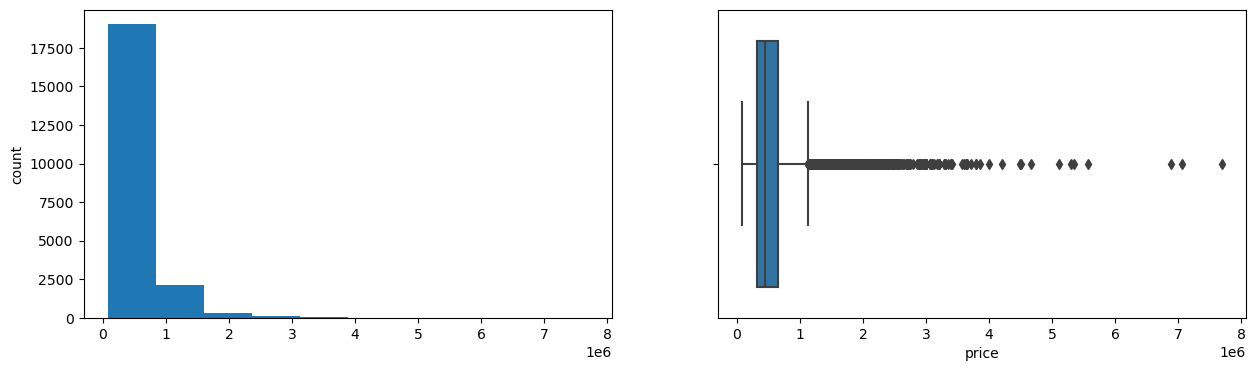

bedrooms
Skew : 2.02


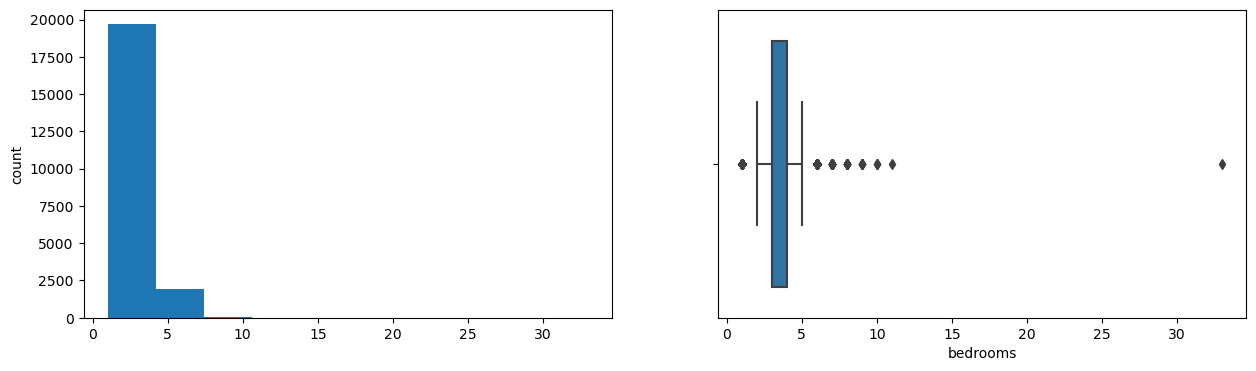

bathrooms
Skew : 0.52


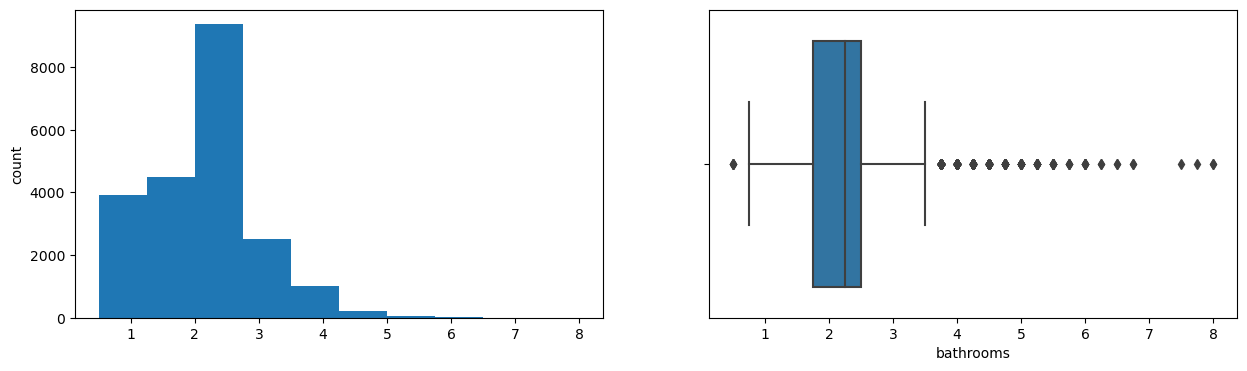

sqft_living
Skew : 1.47


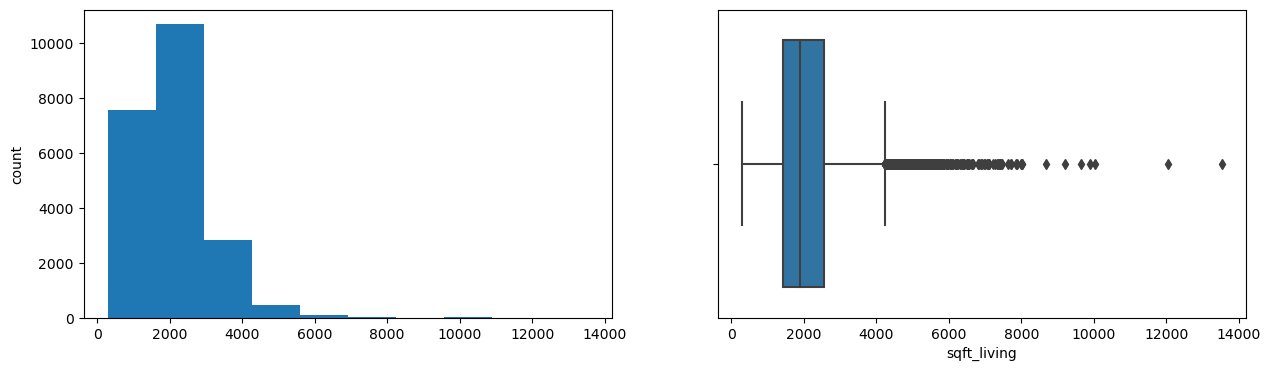

sqft_lot
Skew : 13.06


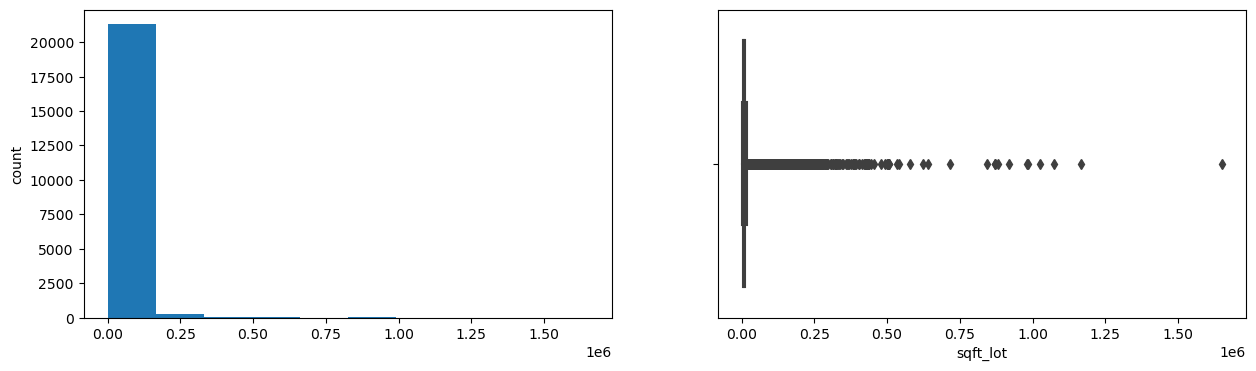

floors
Skew : 0.62


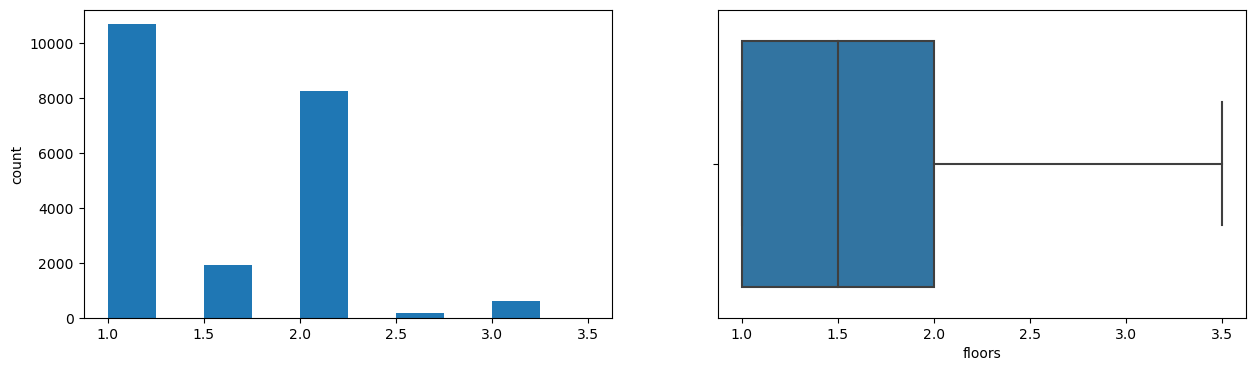

waterfront
Skew : 11.39


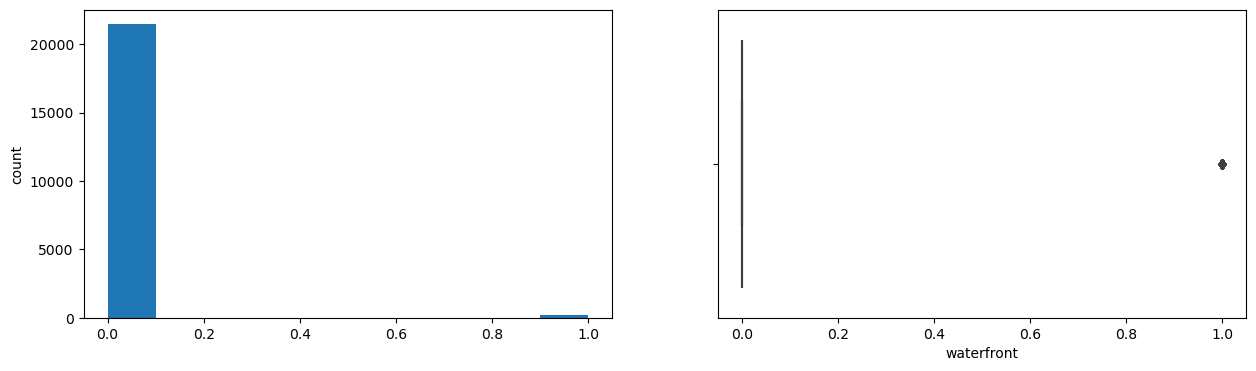

view
Skew : 3.4


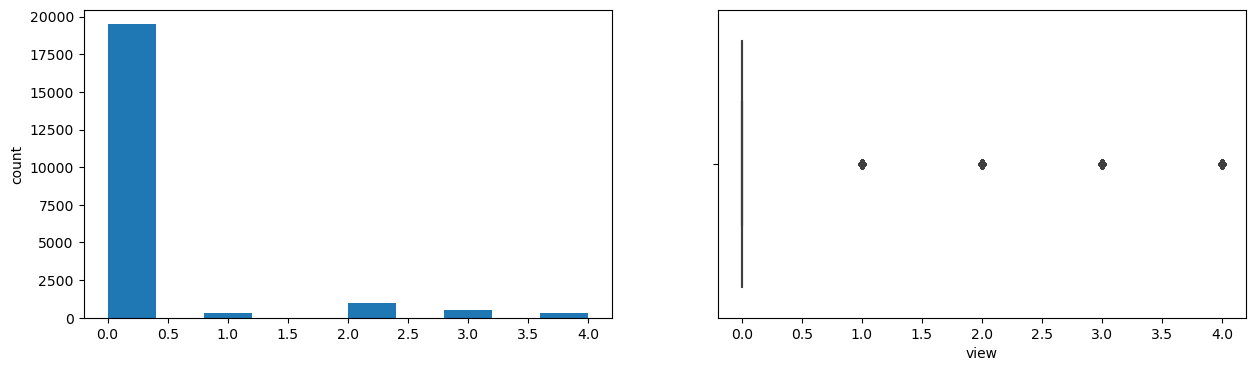

condition
Skew : 1.03


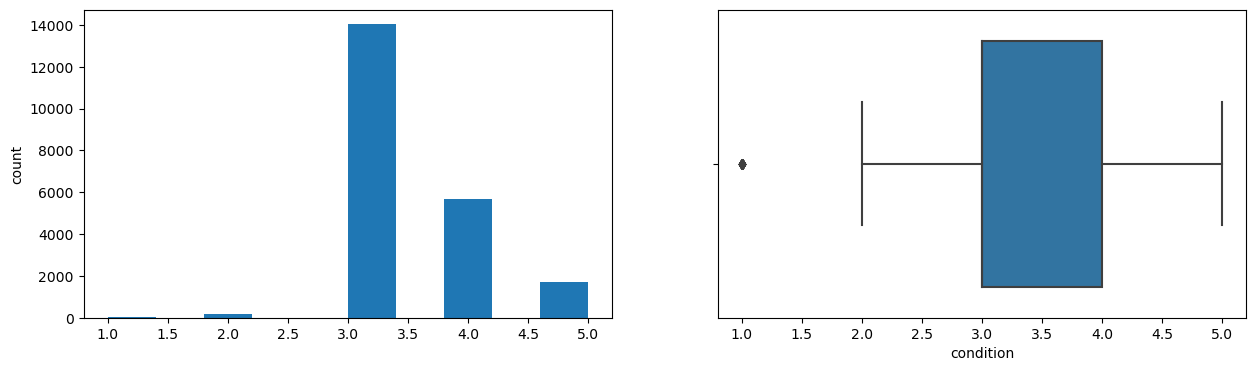

grade
Skew : 0.77


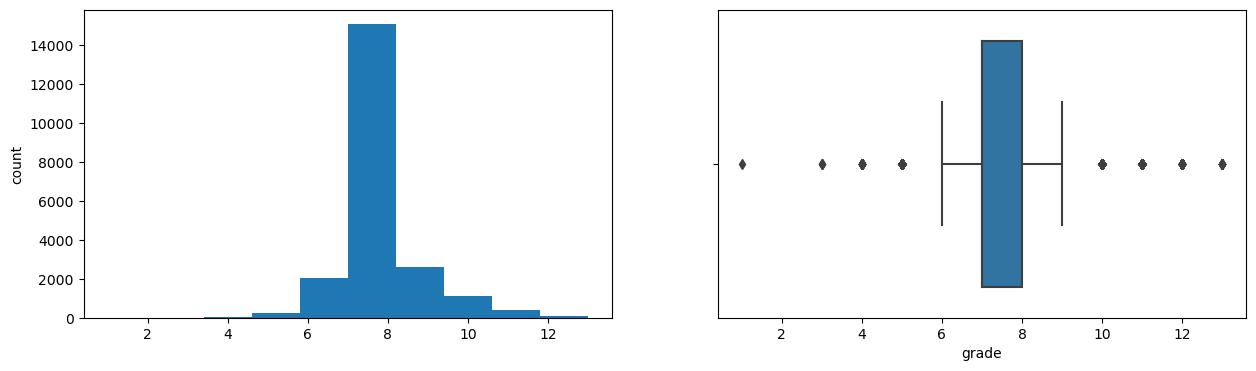

sqft_above
Skew : 1.45


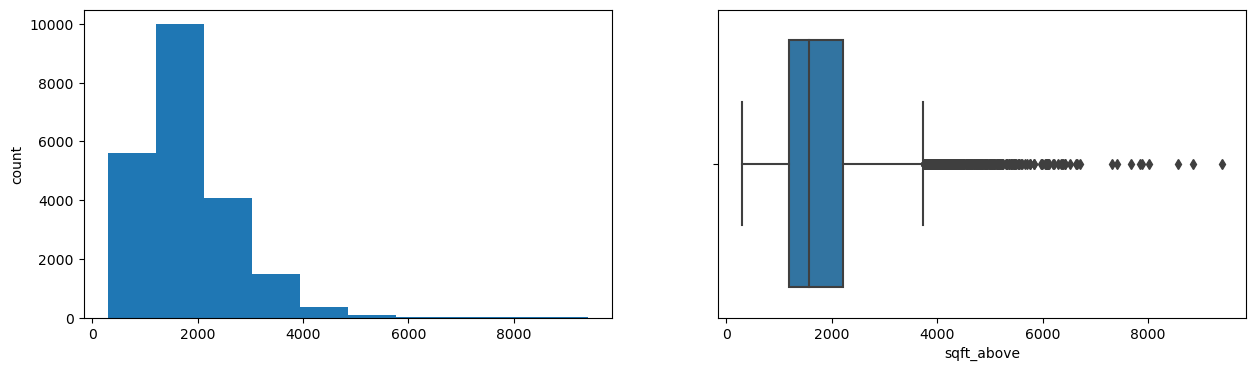

sqft_basement
Skew : 1.58


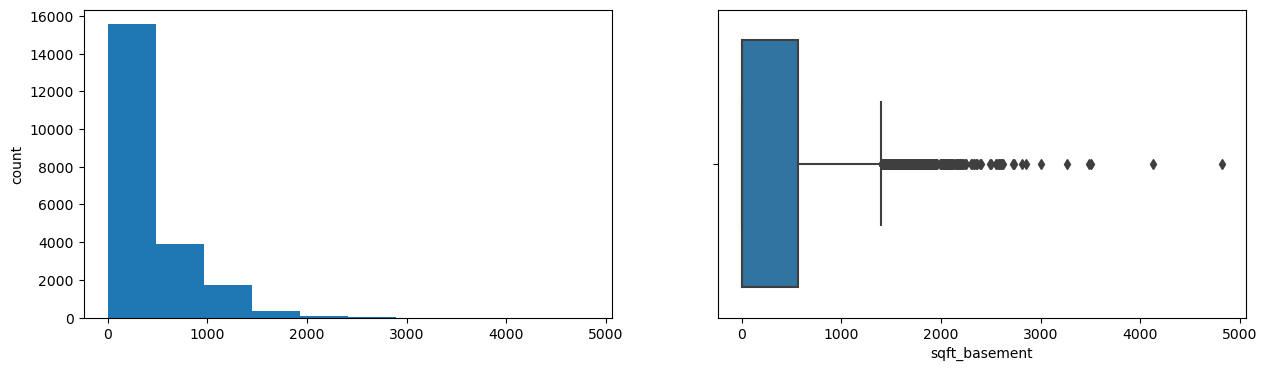

yr_built
Skew : -0.47


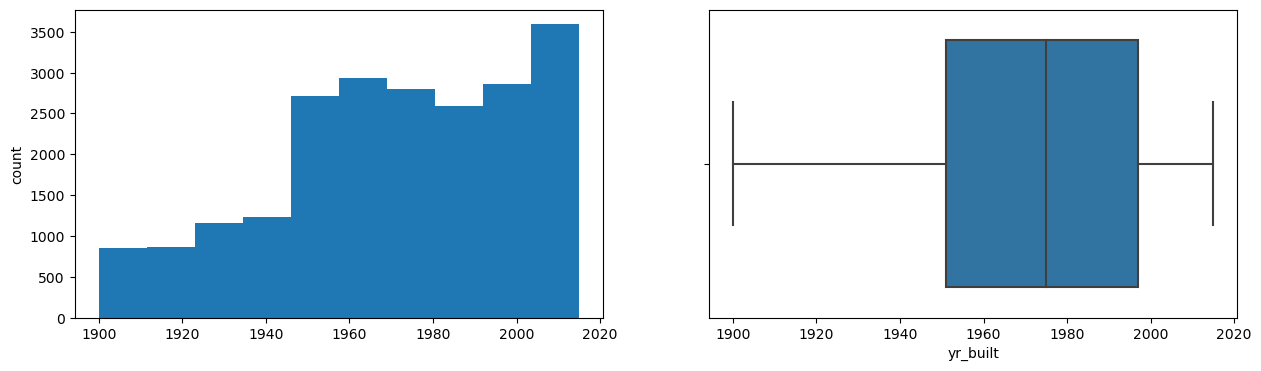

yr_renovated
Skew : 4.55


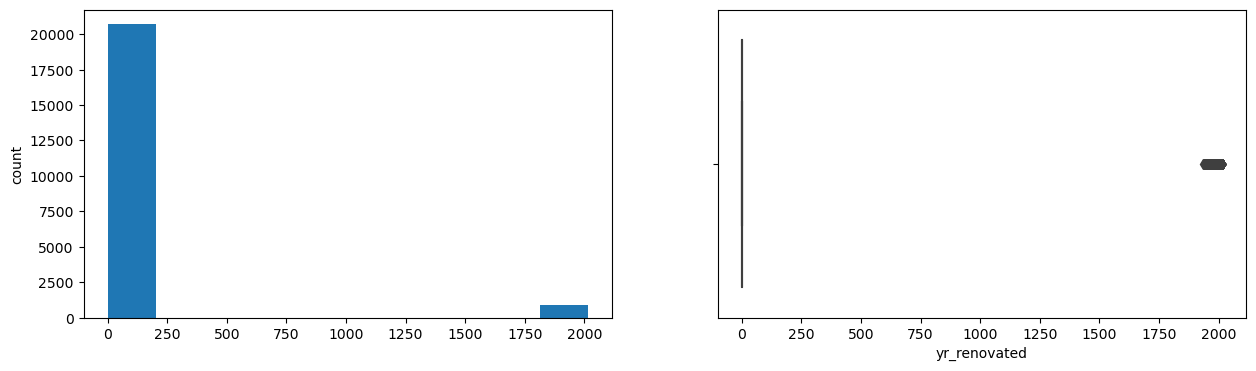

zipcode
Skew : 0.41


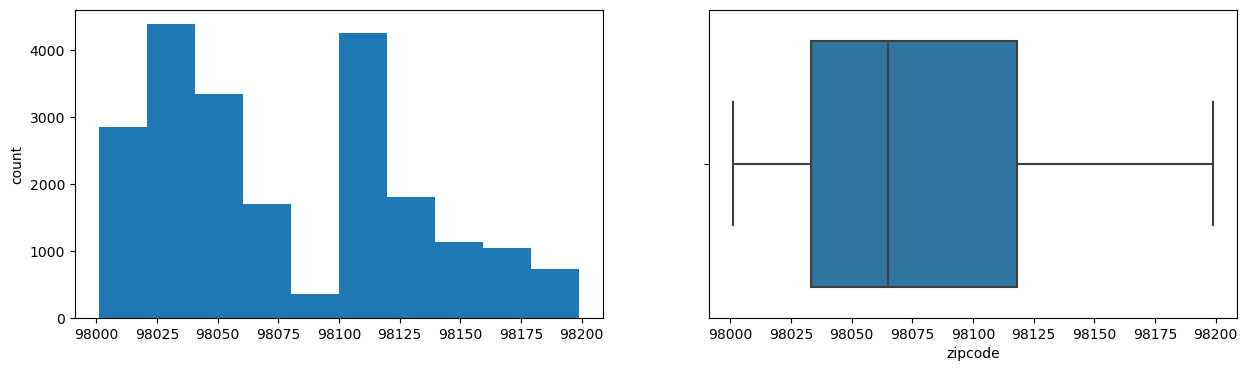

lat
Skew : -0.49


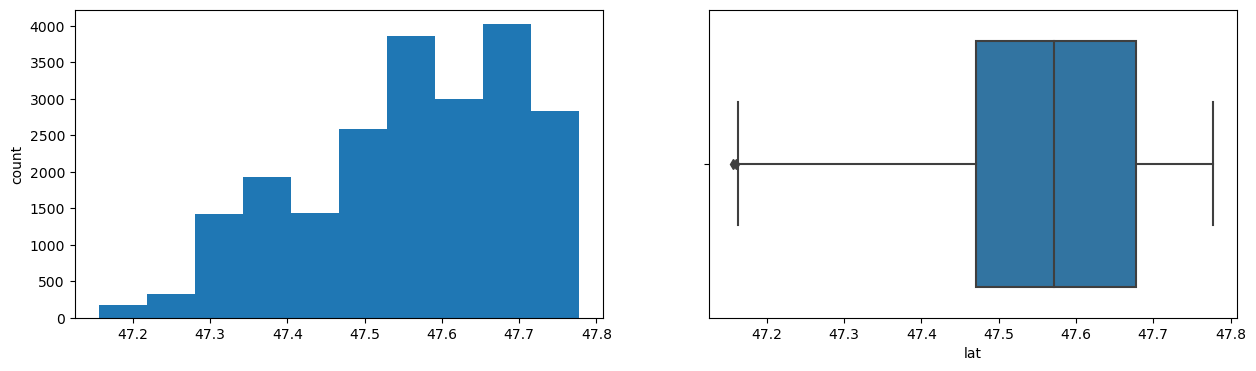

long
Skew : 0.89


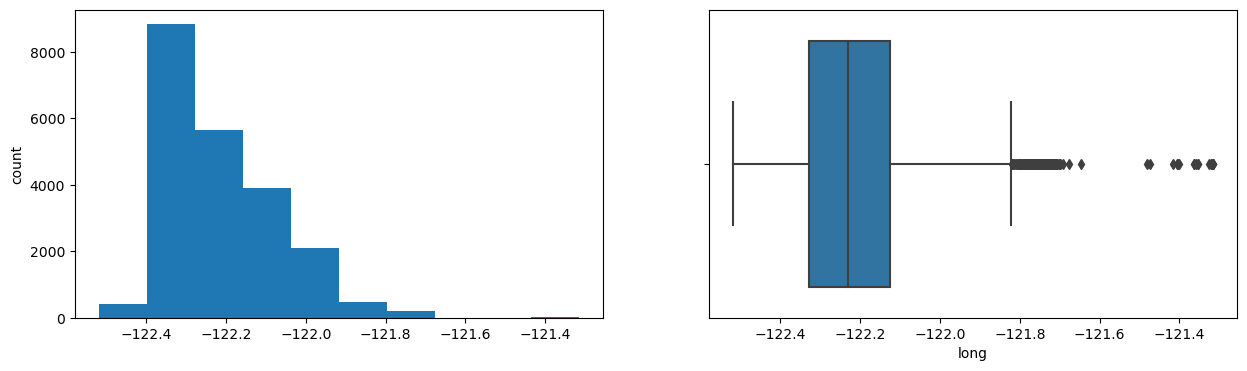

sqft_living15
Skew : 1.11


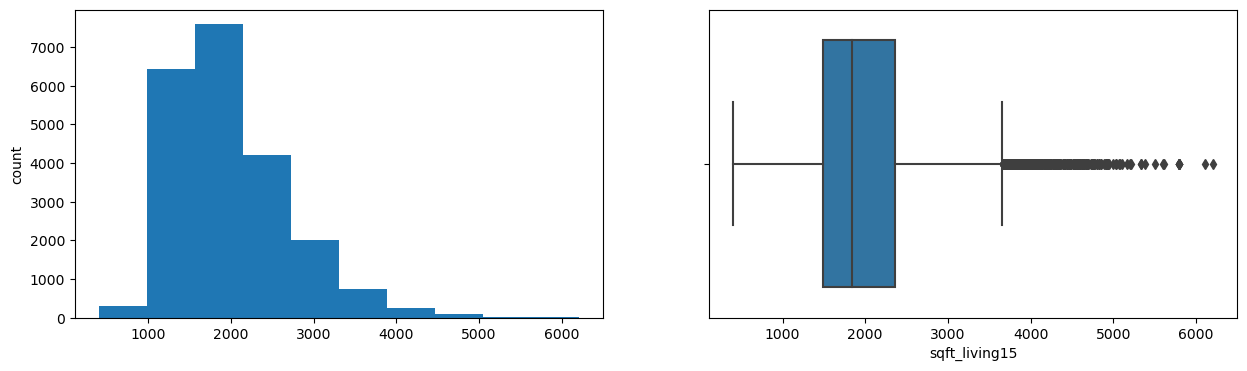

sqft_lot15
Skew : 9.51


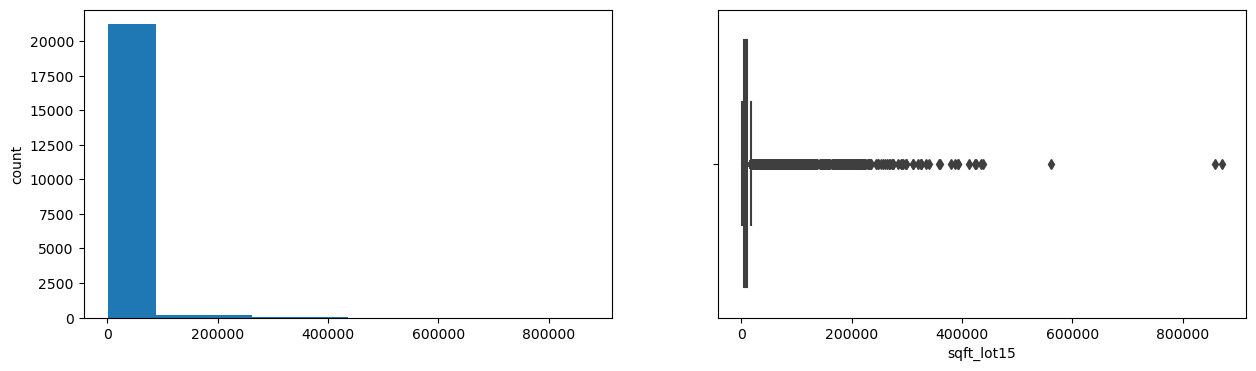

In [15]:
#a histogram and box plot used to show the pattern of the variables, as some variables have skewness and outliers.
for col in num_cols:
    print(col)
    print('Skew :', round(df[col].skew(), 2))
    plt.figure(figsize = (15, 4))
    plt.subplot(1, 2, 1)
    df[col].hist(grid=False)
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col])
    plt.show()

In [16]:
#evaluating distribution kurtosis and asymmetry. It works for numerical features
#Price is the prediction target

print(f"Kurtosis: {df['price'].kurt()}")
print(f"Skewness: {df['price'].skew()}")

Kurtosis: 34.58554043194243
Skewness: 4.024069144684712


In [17]:
#Categorical variables provide the pattern of factors influencing house price

# fig, axes = plt.subplots(3, 2, figsize = (18, 18))
# fig.suptitle('Bar plot for all categorical variables in the dataset')
# sns.countplot(ax = axes[0, 0], x = 'date', data = df, color = 'blue', 
#               order = df['date'].value_counts().index);

# axes.tick_params();

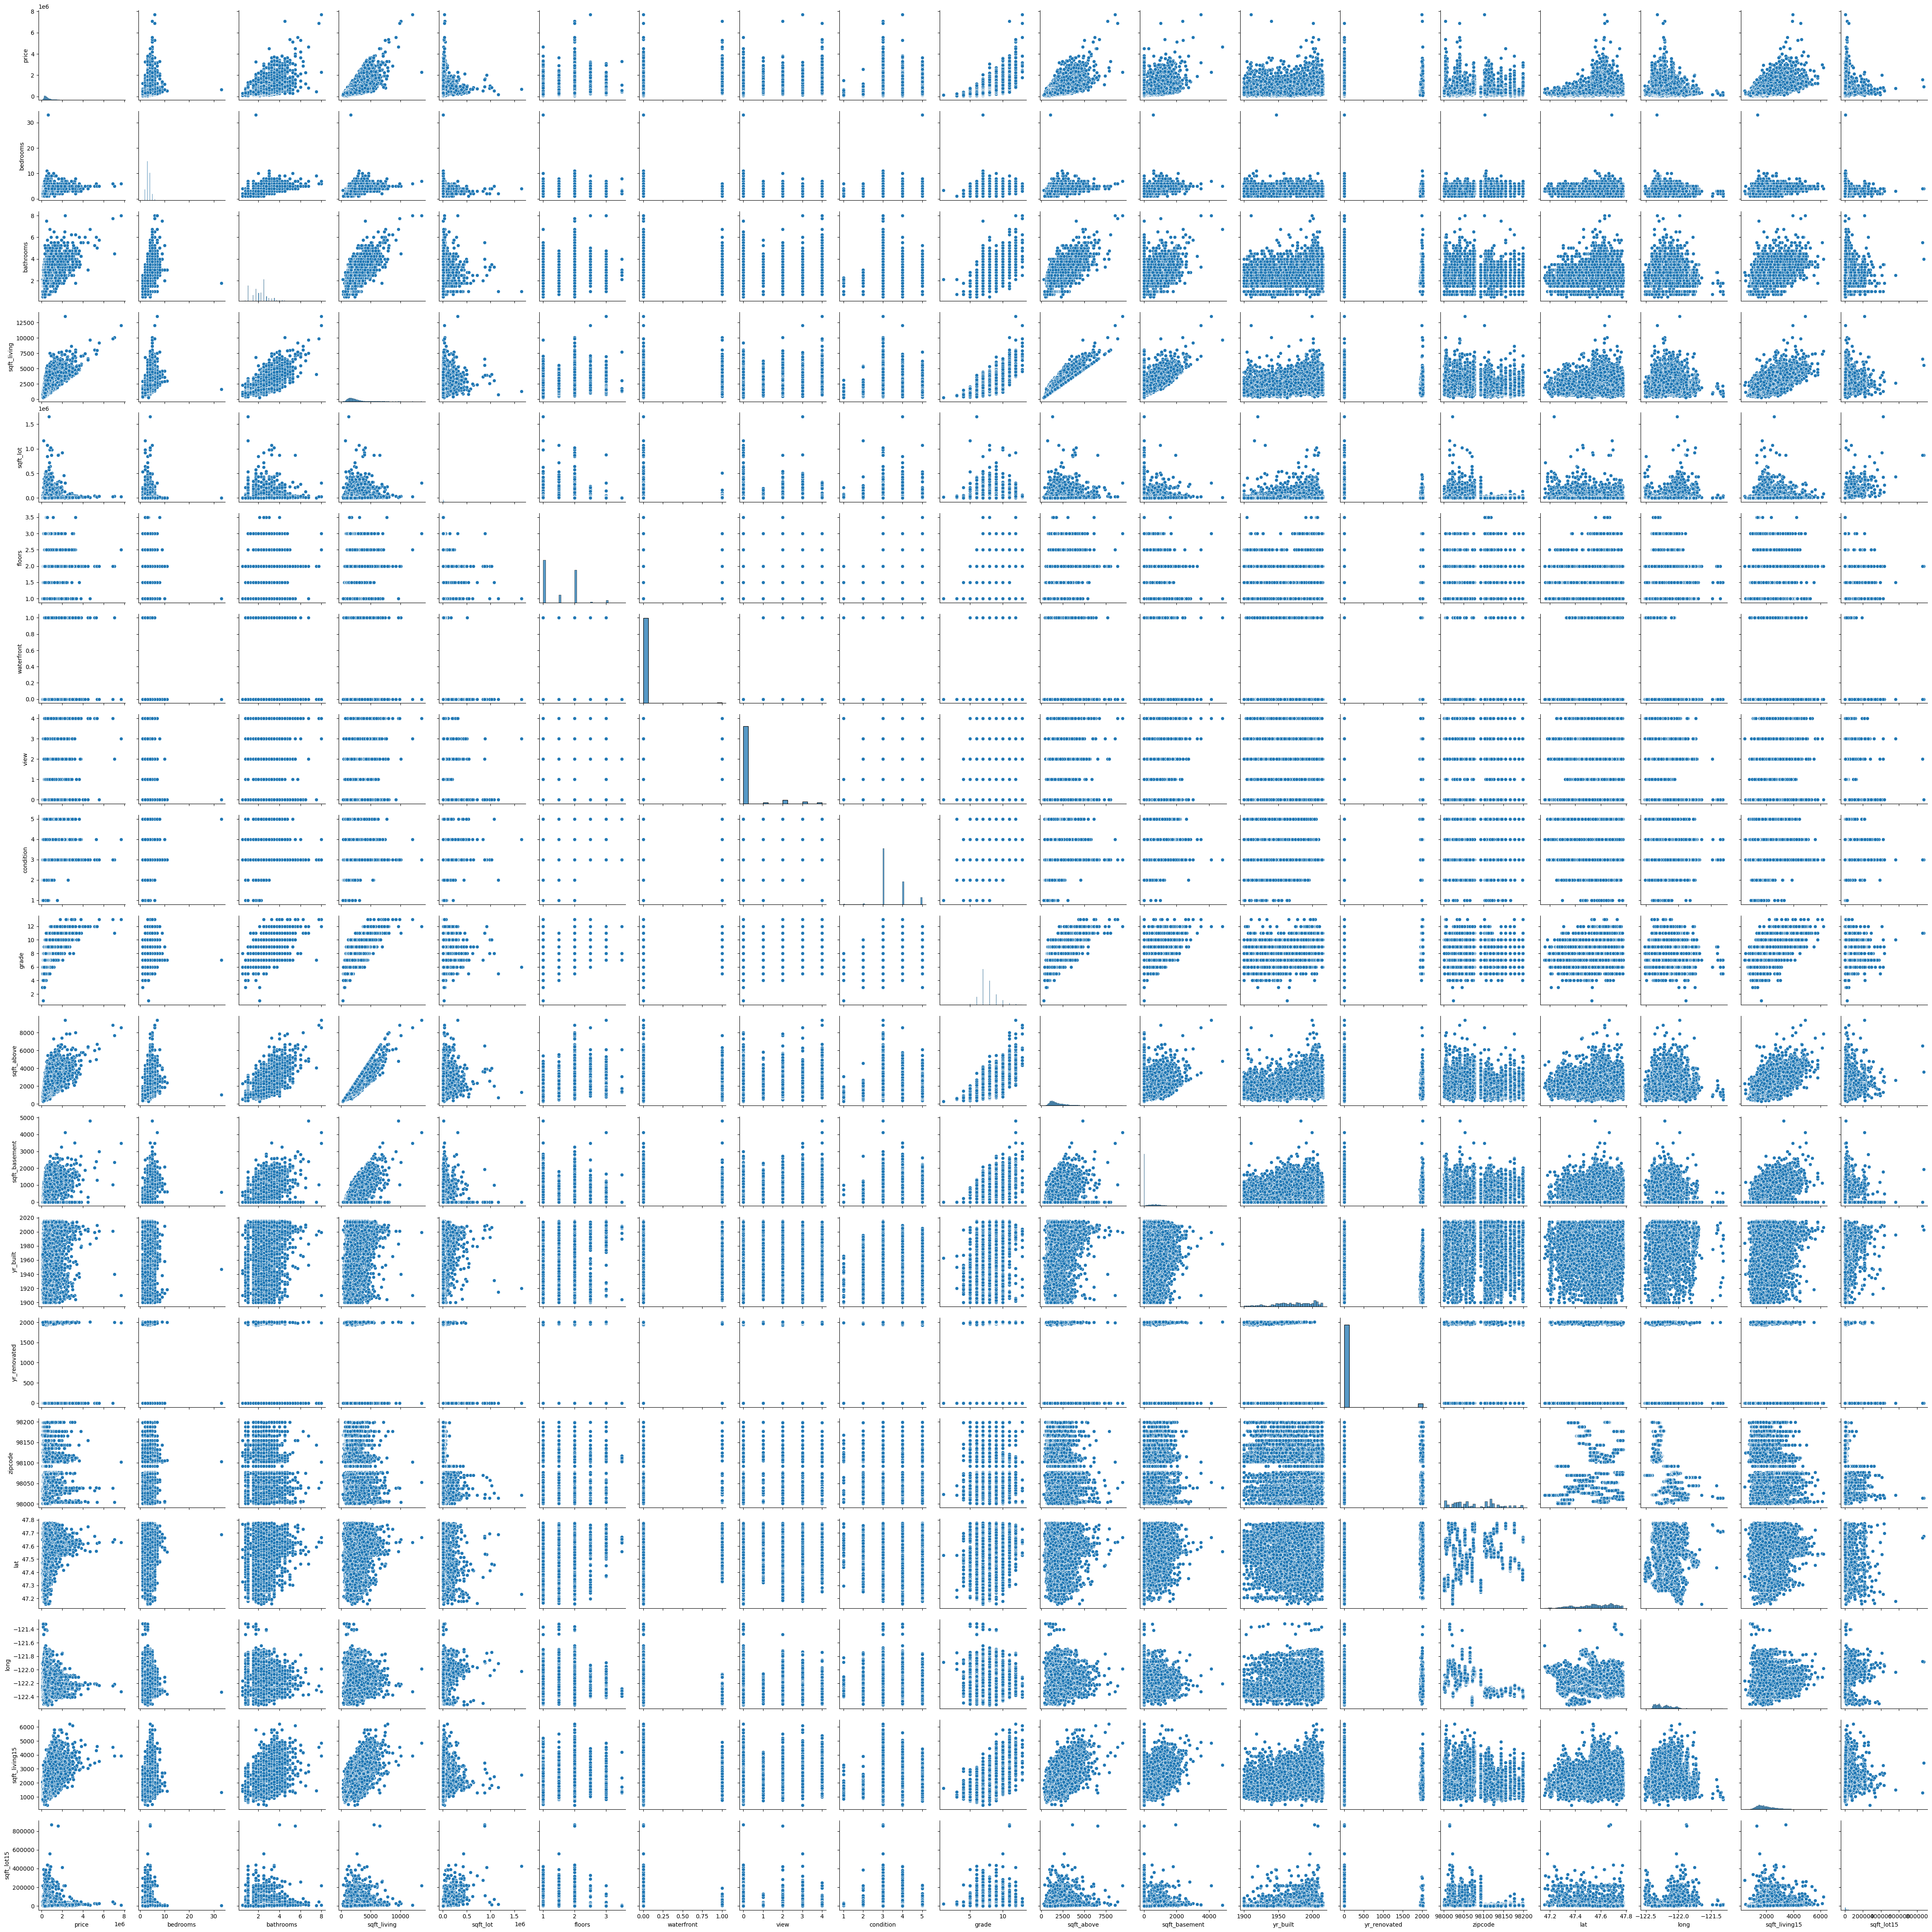

In [18]:
sns.pairplot(df)

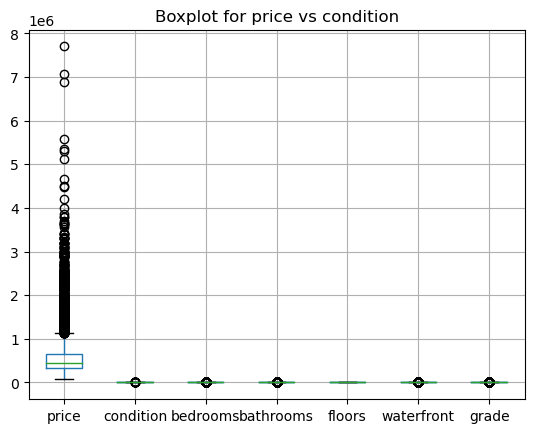

In [48]:
df.boxplot(column=['price', 'condition', 'bedrooms', 'bathrooms', 'floors', 'waterfront', 'grade'])
plt.title("Boxplot for price vs condition")
plt.show()

<Axes: xlabel='waterfront', ylabel='price'>

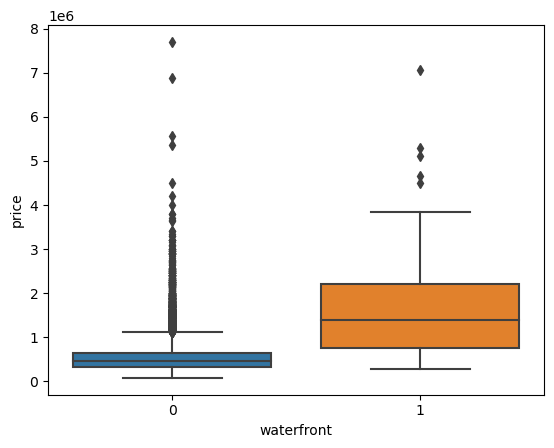

In [50]:
sns.boxplot(x="waterfront", y="price", data=df)

C:\Users\Geraldine\AppData\Local\Temp\ipykernel_32920\3199255953.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)


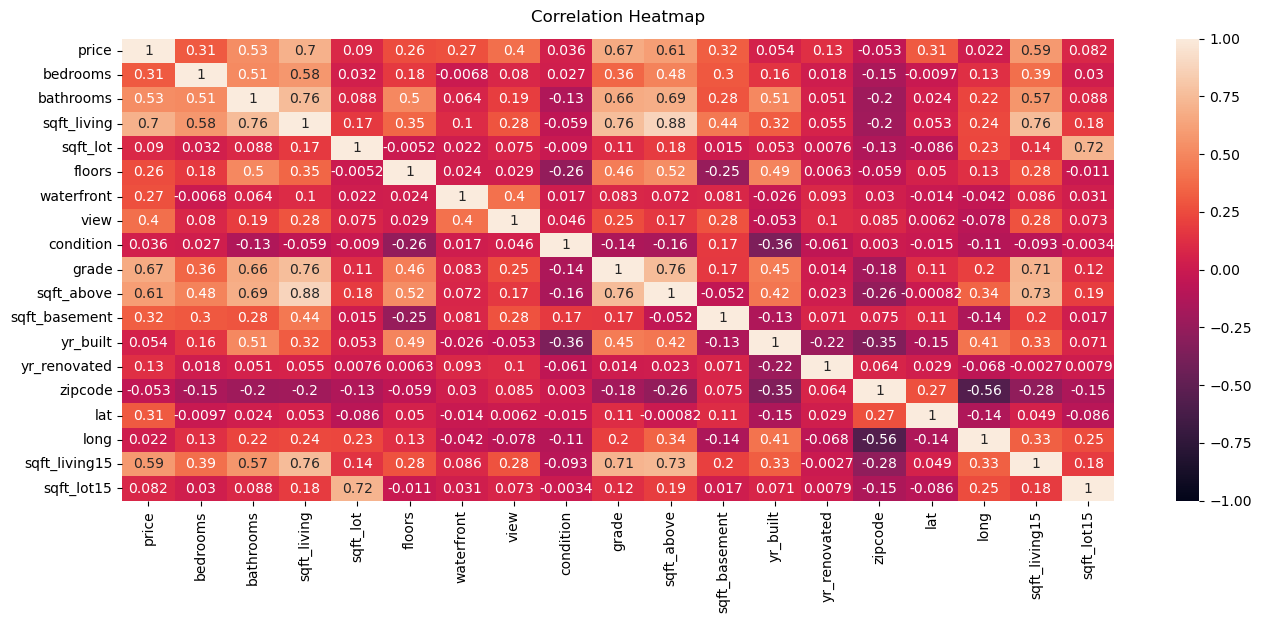

In [20]:
# Increase the size of the heatmap.
plt.figure(figsize=(16, 6))
# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

In [21]:
df.corr()

C:\Users\Geraldine\AppData\Local\Temp\ipykernel_32920\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


price  bedrooms  bathrooms  sqft_living  sqft_lot    floors  \
price          1.000000  0.308797   0.525738     0.702035  0.089661  0.256794   
bedrooms       0.308797  1.000000   0.514194     0.578077  0.032307  0.178022   
bathrooms      0.525738  0.514194   1.000000     0.755371  0.087929  0.502132   
sqft_living    0.702035  0.578077   0.755371     1.000000  0.172826  0.353949   
sqft_lot       0.089661  0.032307   0.087929     0.172826  1.000000 -0.005201   
floors         0.256794  0.178022   0.502132     0.353949 -0.005201  1.000000   
waterfront     0.266369 -0.006800   0.063744     0.103818  0.021604  0.023698   
view           0.397293  0.080058   0.188341     0.284611  0.074710  0.029444   
condition      0.036362  0.026690  -0.126197    -0.058753 -0.008958 -0.263768   
grade          0.667434  0.356589   0.664676     0.762704  0.113621  0.458183   
sqft_above     0.605567  0.479286   0.686309     0.876597  0.183512  0.523885   
sqft_basement  0.323816  0.302856   0.283428     0.435043  0.015286 -0.245705   
yr_built       0.054012  0.155749   0.506913     0.318049  0.053080  0.489319   
yr_renovated   0.126434  0.018456   0.050560     0.055363  0.007644  0.006338   
zipcode       -0.053203 -0.153736  -0.204819    -0.199430 -0.129574 -0.059121   
lat            0.307003 -0.009735   0.024246     0.052529 -0.085683  0.049614   
long           0.021626  0.130978   0.224922     0.240223  0.229521  0.125419   
sqft_living15  0.585379  0.393356   0.569467     0.756420  0.144608  0.279885   
sqft_lot15     0.082447  0.030430   0.087539     0.183286  0.718557 -0.011269   

               waterfront      view  condition     grade  sqft_above  \
price            0.266369  0.397293   0.036362  0.667434    0.605567   
bedrooms        -0.006800  0.080058   0.026690  0.356589    0.479286   
bathrooms        0.063744  0.188341  -0.126197  0.664676    0.686309   
sqft_living      0.103818  0.284611  -0.058753  0.762704    0.876597   
sqft_lot         0.021604  0.074710  -0.008958  0.113621    0.183512   
floors           0.023698  0.029444  -0.263768  0.458183    0.523885   
waterfront       1.000000  0.401857   0.016653  0.082775    0.072075   
view             0.401857  1.000000   0.045990  0.251321    0.167649   
condition        0.016653  0.045990   1.000000 -0.144674   -0.158214   
grade            0.082775  0.251321  -0.144674  1.000000    0.755923   
sqft_above       0.072075  0.167649  -0.158214  0.755923    1.000000   
sqft_basement    0.080588  0.276947   0.174105  0.168392   -0.051943   
yr_built        -0.026161 -0.053440  -0.361417  0.446963    0.423898   
yr_renovated     0.092885  0.103917  -0.060618  0.014414    0.023285   
zipcode          0.030285  0.084827   0.003026 -0.184862   -0.261190   
lat             -0.014274  0.006157  -0.014941  0.114084   -0.000816   
long            -0.041910 -0.078400  -0.106500  0.198372    0.343803   
sqft_living15    0.086463  0.280439  -0.092824  0.713202    0.731870   
sqft_lot15       0.030703  0.072575  -0.003406  0.119248    0.194050   

               sqft_basement  yr_built  yr_renovated   zipcode       lat  \
price               0.323816  0.054012      0.126434 -0.053203  0.307003   
bedrooms            0.302856  0.155749      0.018456 -0.153736 -0.009735   
bathrooms           0.283428  0.506913      0.050560 -0.204819  0.024246   
sqft_living         0.435043  0.318049      0.055363 -0.199430  0.052529   
sqft_lot            0.015286  0.053080      0.007644 -0.129574 -0.085683   
floors             -0.245705  0.489319      0.006338 -0.059121  0.049614   
waterfront          0.080588 -0.026161      0.092885  0.030285 -0.014274   
view                0.276947 -0.053440      0.103917  0.084827  0.006157   
condition           0.174105 -0.361417     -0.060618  0.003026 -0.014941   
grade               0.168392  0.446963      0.014414 -0.184862  0.114084   
sqft_above         -0.051943  0.423898      0.023285 -0.261190 -0.000816   
sqft_basement       1.000000 -0.133124      

In [22]:
print(f"Unique prices :{df['price'].unique()}")
print(f"Unique bedrooms :{df['bedrooms'].unique()}")
print(f"Unique bathrooms :{df['bathrooms'].unique()}")
print(f"Unique view :{df['view'].unique()}")
print(f"Unique floor :{df['floors'].unique()}")

Unique prices :[ 221900.  538000.  180000. ...  610685. 1007500.  402101.]
Unique bedrooms :[ 3.          2.          4.          5.          1.          6.
  7.          3.37287037  8.          9.         11.         10.
 33.        ]
Unique bathrooms :[1.         2.25       3.         2.         4.5        1.5
 2.5        1.75       2.75       3.25       4.         3.5
 0.75       4.75       5.         4.25       3.75       2.11573624
 1.25       5.25       6.         0.5        5.5        6.75
 5.75       8.         7.5        7.75       6.25       6.5       ]
Unique view :[0 3 4 2 1]
Unique floor :[1.  2.  1.5 3.  2.5 3.5]


In [23]:
df.corr().sort_values(by=['price'])

C:\Users\Geraldine\AppData\Local\Temp\ipykernel_32920\1089946442.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr().sort_values(by=['price'])


price  bedrooms  bathrooms  sqft_living  sqft_lot    floors  \
zipcode       -0.053203 -0.153736  -0.204819    -0.199430 -0.129574 -0.059121   
long           0.021626  0.130978   0.224922     0.240223  0.229521  0.125419   
condition      0.036362  0.026690  -0.126197    -0.058753 -0.008958 -0.263768   
yr_built       0.054012  0.155749   0.506913     0.318049  0.053080  0.489319   
sqft_lot15     0.082447  0.030430   0.087539     0.183286  0.718557 -0.011269   
sqft_lot       0.089661  0.032307   0.087929     0.172826  1.000000 -0.005201   
yr_renovated   0.126434  0.018456   0.050560     0.055363  0.007644  0.006338   
floors         0.256794  0.178022   0.502132     0.353949 -0.005201  1.000000   
waterfront     0.266369 -0.006800   0.063744     0.103818  0.021604  0.023698   
lat            0.307003 -0.009735   0.024246     0.052529 -0.085683  0.049614   
bedrooms       0.308797  1.000000   0.514194     0.578077  0.032307  0.178022   
sqft_basement  0.323816  0.302856   0.283428     0.435043  0.015286 -0.245705   
view           0.397293  0.080058   0.188341     0.284611  0.074710  0.029444   
bathrooms      0.525738  0.514194   1.000000     0.755371  0.087929  0.502132   
sqft_living15  0.585379  0.393356   0.569467     0.756420  0.144608  0.279885   
sqft_above     0.605567  0.479286   0.686309     0.876597  0.183512  0.523885   
grade          0.667434  0.356589   0.664676     0.762704  0.113621  0.458183   
sqft_living    0.702035  0.578077   0.755371     1.000000  0.172826  0.353949   
price          1.000000  0.308797   0.525738     0.702035  0.089661  0.256794   

               waterfront      view  condition     grade  sqft_above  \
zipcode          0.030285  0.084827   0.003026 -0.184862   -0.261190   
long            -0.041910 -0.078400  -0.106500  0.198372    0.343803   
condition        0.016653  0.045990   1.000000 -0.144674   -0.158214   
yr_built        -0.026161 -0.053440  -0.361417  0.446963    0.423898   
sqft_lot15       0.030703  0.072575  -0.003406  0.119248    0.194050   
sqft_lot         0.021604  0.074710  -0.008958  0.113621    0.183512   
yr_renovated     0.092885  0.103917  -0.060618  0.014414    0.023285   
floors           0.023698  0.029444  -0.263768  0.458183    0.523885   
waterfront       1.000000  0.401857   0.016653  0.082775    0.072075   
lat             -0.014274  0.006157  -0.014941  0.114084   -0.000816   
bedrooms        -0.006800  0.080058   0.026690  0.356589    0.479286   
sqft_basement    0.080588  0.276947   0.174105  0.168392   -0.051943   
view             0.401857  1.000000   0.045990  0.251321    0.167649   
bathrooms        0.063744  0.188341  -0.126197  0.664676    0.686309   
sqft_living15    0.086463  0.280439  -0.092824  0.713202    0.731870   
sqft_above       0.072075  0.167649  -0.158214  0.755923    1.000000   
grade            0.082775  0.251321  -0.144674  1.000000    0.755923   
sqft_living      0.103818  0.284611  -0.058753  0.762704    0.876597   
price            0.266369  0.397293   0.036362  0.667434    0.605567   

               sqft_basement  yr_built  yr_renovated   zipcode       lat  \
zipcode             0.074845 -0.346869      0.064357  1.000000  0.267048   
long               -0.144765  0.409356     -0.068372 -0.564072 -0.135512   
condition           0.174105 -0.361417     -0.060618  0.003026 -0.014941   
yr_built           -0.133124  1.000000     -0.224874 -0.346869 -0.148122   
sqft_lot15          0.017276  0.070958      0.007854 -0.147221 -0.086419   
sqft_lot            0.015286  0.053080      0.007644 -0.129574 -0.085683   
yr_renovated        0.071323 -0.224874      1.000000  0.064357  0.029398   
floors             -0.245705  0.489319      0.006338 -0.059121  0.049614   
waterfront          0.080588 -0.026161      0.092885  0.030285 -0.014274   
lat                 0.110538 -0.148122      0.029398  0.267048  1.000000   
bedrooms            0.302856  0.155749      0.018456 -0.153736 -0.009735   
sqft_basement       1.000000 -0.133124      

In [24]:
df.describe().T

count           mean            std         min         25%  \
price          21613.0  540088.141767  367127.196483  75000.0000  321950.000   
bedrooms       21613.0       3.372870       0.926378      1.0000       3.000   
bathrooms      21613.0       2.115736       0.768818      0.5000       1.750   
sqft_living    21613.0    2079.899736     918.440897    290.0000    1427.000   
sqft_lot       21613.0   15106.967566   41420.511515    520.0000    5040.000   
floors         21613.0       1.494309       0.539989      1.0000       1.000   
waterfront     21613.0       0.007542       0.086517      0.0000       0.000   
view           21613.0       0.234303       0.766318      0.0000       0.000   
condition      21613.0       3.409430       0.650743      1.0000       3.000   
grade          21613.0       7.656873       1.175459      1.0000       7.000   
sqft_above     21613.0    1788.390691     828.090978    290.0000    1190.000   
sqft_basement  21613.0     291.509045     442.575043      0.0000       0.000   
yr_built       21613.0    1971.005136      29.373411   1900.0000    1951.000   
yr_renovated   21613.0      84.402258     401.679240      0.0000       0.000   
zipcode        21613.0   98077.939805      53.505026  98001.0000   98033.000   
lat            21613.0      47.560053       0.138564     47.1559      47.471   
long           21613.0    -122.213896       0.140828   -122.5190    -122.328   
sqft_living15  21613.0    1986.552492     685.391304    399.0000    1490.000   
sqft_lot15     21613.0   12768.455652   27304.179631    651.0000    5100.000   

                       50%         75%           max  
price          450000.0000  645000.000  7.700000e+06  
bedrooms            3.0000       4.000  3.300000e+01  
bathrooms           2.2500       2.500  8.000000e+00  
sqft_living      1910.0000    2550.000  1.354000e+04  
sqft_lot         7618.0000   10688.000  1.651359e+06  
floors              1.5000       2.000  3.500000e+00  
waterfront          0.0000       0.000  1.000000e+00  
view                0.0000       0.000  4.000000e+00  
condition           3.0000       4.000  5.000000e+00  
grade               7.0000       8.000  1.300000e+01  
sqft_above       1560.0000    2210.000  9.410000e+03  
sqft_basement       0.0000     560.000  4.820000e+03  
yr_built         1975.0000    1997.000  2.015000e+03  
yr_renovated        0.0000       0.000  2.015000e+03  
zipcode         98065.0000   98118.000  9.819900e+04  
lat                47.5718      47.678  4.777760e+01  
long             -122.2300    -122.125 -1.213150e+02  
sqft_living15    1840.0000    2360.000  6.210000e+03  
sqft_lot15       7620.0000   10083.000  8.712000e+05

In [25]:
#Based on my correlation matrix, I can single put columns that don't play much in my dataset's purpose

# MODEL DEVELOPMENT

In [39]:
X = df.drop(["price", "date"], axis = 1)
y = df['price']

#Use train_test_split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10)

In [41]:
model = LinearRegression()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.7026745636501694

In [43]:
print("number of test samples:", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples: 4323
number of training samples: 17290


# MODEL EVALUATION AND REFINEMENT

In [44]:
from sklearn.linear_model import Ridge

In [45]:
RidgeModel = Ridge(alpha=0.1)
RidgeModel.fit(X_train, y_train)
print("Predicted values: " +str(RidgeModel.predict(X_test)))

Predicted values: [ 367787.74351773  576619.36176351 -560198.97933772 ... 1019636.07470427
  473575.07823972  583179.92253238]
